In [1]:
from sklearn.neighbors import KNeighborsClassifier
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/RyanSampana/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Looking at the data from the NYU Dataset
### We obtain the labeled data set from http://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html
The matlab variables are: 
- accelData – Nx4 matrix of accelerometer values indicated when each frame was taken. The columns contain the roll, yaw, pitch and tilt angle of the device.
- depths – HxWxN matrix of in-painted depth maps where H and W are the height and width, respectively and N is the number of images. The values of the depth elements are in meters.
- images – HxWx3xN matrix of RGB images where H and W are the height and width, respectively, and N is the number of images.
- instances – HxWxN matrix of instance maps. Use get_instance_masks.m in the Toolbox to recover masks for each object instance in a scene.
- labels – HxWxN matrix of object label masks where H and W are the height and width, respectively and N is the number of images. The labels range from 1..C where C is the total number of classes. If a pixel’s label value is 0, then that pixel is ‘unlabeled’.
- names – Cx1 cell array of the english names of each class.
- namesToIds – map from english label names to class IDs (with C key-value pairs)
- rawDepths – HxWxN matrix of raw depth maps where H and W are the height and width, respectively, and N is the number of images. These depth maps capture the depth images after they have been projected onto the RGB image plane but before the missing depth values have been filled in. Additionally, the depth non-linearity from the Kinect device has been removed and the values of each depth image are in meters.
- rawDepthFilenames – Nx1 cell array of the filenames (in the Raw dataset) that were used for each of the depth images in the labeled dataset.
- rawRgbFilenames – Nx1 cell array of the filenames (in the Raw dataset) that were used for each of the RGB images in the labeled dataset.
- scenes – Nx1 cell array of the name of the scene from which each image was taken.
- sceneTypes – Nx1 cell array of the scene type from which each image was taken.

In [2]:
im1 = cv2.imread('./nyudata/nyu_1.png')
im1d = cv2.imread('./nyudata/nyu_depth_1.png')

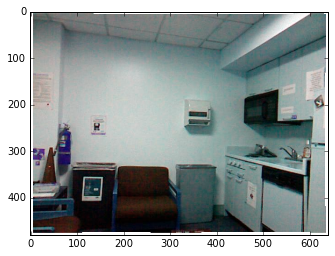

In [3]:
plt.imshow(im1)

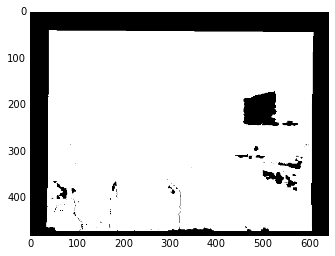

In [4]:
plt.imshow(im1d)

In [5]:
data = np.array( [cv2.imread('./nyudata/nyu_1.png') ])
depth = np.array([cv2.imread('./nyudata/nyu_depth_1.png',0)])
print data.shape
print depth.shape

(1, 480, 640, 3)
(1, 480, 640)


In [6]:
flat = []
for x in range(0,480):
    for y in range(0,640):
        flat.append([x,y,data[0,x,y,0],data[0,x,y,1],data[0,x,y,2],depth[0,x,y]])
            

In [7]:
flat[2]

[0, 2, 255, 255, 255, 0]

In [8]:
import pandas as pd
df = pd.read_csv('./point_cloud.csv', header = None)
df.columns = ['X','Y','Z','R','G','B']

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(flat)
kmeans.labels_

array([5, 5, 5, ..., 4, 4, 4], dtype=int32)

In [10]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(df)
labels = kmeans.labels_

In [12]:
# print len(df['X'][df['labels'] == label])
# print len(df['Y'][df['labels'] == labels])

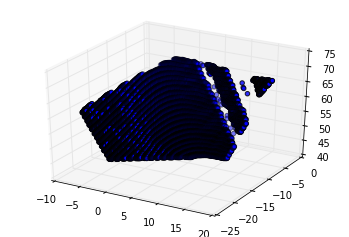

In [15]:
from mpl_toolkits.mplot3d import Axes3D
df['labels'] = labels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
label = 1
ax.scatter(df['X'][df['labels'] == label],df['Y'][df['labels'] == label],df['Z'][df['labels'] == label],'.')